In [1]:
from __future__ import print_function

from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import six

%matplotlib inline


import flotilla


flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'
study = flotilla.embark('singlecell_pnm', flotilla_dir=flotilla_dir)

2017-01-06 22:45:42	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm/datapackage.json
2017-01-06 22:45:42	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.


/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Error loading species hg19 data: HTTP Error 404: Not Found

2017-01-06 22:45:57 	Initializing Study
2017-01-06 22:45:57 	Initializing Predictor configuration manager for Study
2017-01-06 22:45:57	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-06 22:45:57	Added ExtraTreesClassifier to default predictors
2017-01-06 22:45:57	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-06 22:45:57	Added ExtraTreesRegressor to default predictors
2017-01-06 22:45:57	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2017-01-06 22:45:57	Added GradientBoostingClassifier to default predictors
2017-01-06 22:45:57	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2017-01-06 22:45:57	Added GradientBoostingRegressor to default predictors
2017-01-06 22:45:57 	Loading metadata
2017-01-06 22:45:57	Loading expression data
2017-0

In [2]:
sns.set(style='white', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

In [33]:
figure_folder = 'figures/021_outrigger_vs_rmdup_percentages'
! mkdir -p $figure_folder

In [4]:
folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
original_folder = '{}/outrigger_v2/psi'.format(folder)
rmdup_folder = '{}/csvs_for_paper/outrigger_v2_rmdup/psi'.format(folder)

In [5]:
case_order = ['Case {}'.format(i+1) for i in range(8)] + ['Case {}{}'.format(i+1, x) for i in range(8, 11) for x in 'ab']
case_order

['Case 1',
 'Case 2',
 'Case 3',
 'Case 4',
 'Case 5',
 'Case 6',
 'Case 7',
 'Case 8',
 'Case 9a',
 'Case 9b',
 'Case 10a',
 'Case 10b',
 'Case 11a',
 'Case 11b']

In [6]:
len(case_order)

14

In [7]:
summary = pd.read_csv('{}/outrigger_summary_original_rmdup_combined.csv'.format(folder))

/home/obotvinnik/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (21,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Percent of events in each category

In [8]:
max_delta_psi = 0.2

In [24]:
col = 'comparison_categories'

summary[col] = 'Other'
summary.loc[summary['psi_rmdup'].isnull() & summary['psi_original'].isnull(), col] = 'rmdup NA, original NA'
summary.loc[(summary['psi_rmdup'] - summary['psi_original']).abs() <= max_delta_psi, col] = \
    'Within $|\Delta\Psi| \leq {}$'.format(max_delta_psi)
summary.loc[summary['psi_rmdup'].notnull() & summary['psi_original'].isnull(), col] = 'rmdup Psi, original NA'
summary.loc[summary['psi_rmdup'].isnull() & summary['psi_original'].notnull(), col] = 'rmdup NA, original Psi'
summary.loc[(summary['psi_rmdup'] == 0) & (summary['psi_original'] > max_delta_psi), col] = 'rmdup 0, original Psi'
summary.loc[(summary['psi_rmdup'] == 1) & (summary['psi_original'] < (1 - max_delta_psi)), col] = 'rmdup 1, original Psi'
category_sizes = summary.groupby(col).size()
category_sizes

comparison_categories
Other                                  124
Within $|\Delta\Psi| \leq 0.2$      502814
rmdup 0, original Psi                 2143
rmdup 1, original Psi                 1585
rmdup NA, original NA             11219143
rmdup NA, original Psi              824338
rmdup Psi, original NA               17172
dtype: int64

In [25]:
category_percentages = 100 * category_sizes/category_sizes.sum()
category_percentages

comparison_categories
Other                              0.000987
Within $|\Delta\Psi| \leq 0.2$     4.000965
rmdup 0, original Psi              0.017052
rmdup 1, original Psi              0.012612
rmdup NA, original NA             89.272366
rmdup NA, original Psi             6.559378
rmdup Psi, original NA             0.136640
dtype: float64

In [128]:
category_sizes_not_both_na = category_sizes[(category_sizes.index != "rmdup NA, original NA")]
category_sizes_not_both_na

comparison_categories
Other                                124
Within $|\Delta\Psi| \leq 0.2$    502814
rmdup 0, original Psi               2143
rmdup 1, original Psi               1585
rmdup NA, original Psi            824338
rmdup Psi, original NA             17172
dtype: int64

In [129]:
category_sizes_not_both_na.sum()

1348176

In [144]:
original_not_na = [x for x in category_sizes_not_both_na.index if 'original NA' not in x]

category_sizes_percent_original = 100 * category_sizes_not_both_na[original_not_na]/summary['psi_original'].notnull().sum()
category_sizes_percent_original.name = 'original'
category_sizes_percent_original

comparison_categories
Other                              0.009316
Within $|\Delta\Psi| \leq 0.2$    37.777047
rmdup 0, original Psi              0.161006
rmdup 1, original Psi              0.119083
rmdup NA, original Psi            61.933548
Name: original, dtype: float64

In [145]:
rmdup_not_na = [x for x in category_sizes_not_both_na.index if 'rmdup NA' not in x]

category_sizes_percent_rmdup = 100 * category_sizes_not_both_na[rmdup_not_na]/summary['psi_rmdup'].notnull().sum()
category_sizes_percent_rmdup.name = 'rmdup'
category_sizes_percent_rmdup

comparison_categories
Other                              0.023671
Within $|\Delta\Psi| \leq 0.2$    95.986545
rmdup 0, original Psi              0.409096
rmdup 1, original Psi              0.302574
rmdup Psi, original NA             3.278113
Name: rmdup, dtype: float64

In [147]:
category_percentages_df = category_sizes_percent_rmdup.to_frame().join(category_sizes_percent_original, how='outer')
category_percentages_df

,rmdup,original
comparison_categories,,
Other,0.023671,0.009316
Within $|\Delta\Psi| \leq 0.2$,95.986545,37.777047
"rmdup 0, original Psi",0.409096,0.161006
"rmdup 1, original Psi",0.302574,0.119083
"rmdup NA, original Psi",NaN,61.933548
"rmdup Psi, original NA",3.278113,NaN


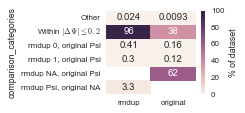

In [154]:
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.heatmap(category_percentages_df, annot=True, vmin=0, vmax=100, cbar_kws=dict(label='% of dataset'))

In [149]:
category_sizes_not_both_na_percentage = 100 * category_sizes_not_both_na/category_sizes_not_both_na.sum()
category_sizes_not_both_na_percentage

comparison_categories
Other                              0.009198
Within $|\Delta\Psi| \leq 0.2$    37.295872
rmdup 0, original Psi              0.158956
rmdup 1, original Psi              0.117566
rmdup NA, original Psi            61.144687
rmdup Psi, original NA             1.273721
dtype: float64

In [132]:
category_sizes_not_both_na_percentage_tidy = category_sizes_not_both_na_percentage.reset_index()
category_sizes_not_both_na_percentage_tidy = category_sizes_not_both_na_percentage_tidy.rename(columns={0: 'Percentage'})
category_sizes_not_both_na_percentage_tidy

,comparison_categories,Percentage
0,Other,0.009198
1,Within $|\Delta\Psi| \leq 0.2$,37.295872
2,"rmdup 0, original Psi",0.158956
3,"rmdup 1, original Psi",0.117566
4,"rmdup NA, original Psi",61.144687
5,"rmdup Psi, original NA",1.273721


In [32]:
figure_folder

'figures/020_outrigger_rmdup_comparison'

In [50]:
import matplotlib as mpl

In [53]:
not_within = [x for x in category_sizes_not_both_na.index if 'Within' not in x]
not_within

['Other',
 'rmdup 0, original Psi',
 'rmdup 1, original Psi',
 'rmdup NA, original Psi',
 'rmdup Psi, original NA']

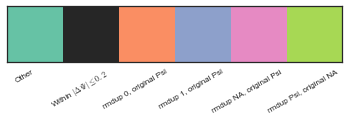

In [81]:
palette = dict(zip(not_within, map(mpl.colors.rgb2hex, sns.color_palette('Set2'))))
palette['Within $|\Delta\Psi| \leq 0.2$'] = '#262626'
palette = pd.Series(palette)
sns.palplot(palette)

ax = plt.gca()
ax.set(xticks=np.arange(len(palette))-0.2)
ax.set_xticklabels(palette.index, rotation=30)

(1.759197612181199, 0.2)
(39.045872349010814, 1.2)
(1.9089555072928164, 2.2)
(1.8675662524774213, 3.2)
(62.894687340525273, 4.2)
(3.0237209385124793, 5.2)


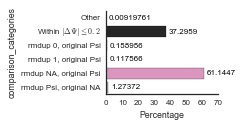

In [59]:
fig, ax = plt.subplots(figsize=(2, 1.5))

sns.barplot(y='comparison_categories', x='Percentage', 
            data=category_sizes_not_both_na_tidy, palette=palette)
sns.despine()
ax.set(xlabel='Percentage')
xmin, xmax = ax.get_xlim()
x_value_range = xmax - xmin
xoffset = 0.025 * xmax

for i, (case, x) in enumerate(category_sizes_not_both_na.iteritems()):
#     x = category_sizes_not_both_na[case]
    coords = (x + xoffset, i+0.2)
    print(coords)
    ax.annotate("{:g}".format(x), coords, fontsize=8, 
                va='bottom', ha='left', color='black')

fig.savefig('{}/comparison_categories_percentages_barplots_fullsize.pdf'.format(figure_folder))


# ax.set(xlim=(0, 2))
# fig.savefig('{}/comparison_categories_percentages_barplots_zoomed.pdf'.format(figure_folder))

## Make scatterplots

In [68]:
summary.shape

(12567319, 27)

In [64]:
summary_not_both_na = summary.loc[summary['psi_original'].notnull() | summary['psi_rmdup'].notnull()]
print(summary_not_both_na.shape)
summary_not_both_na.head()

(1348176, 27)


,sample_id,event_id,incompatible_junction0_original,incompatible_junction1_original,isoform1_junction13_original,isoform1_junction34_original,isoform2_junction12_original,isoform2_junction23_original,isoform2_junction24_original,notes_original,...,isoform1_junction34_rmdup,isoform2_junction12_rmdup,isoform2_junction23_rmdup,isoform2_junction24_rmdup,notes_rmdup,psi_rmdup,bam,notes_abbrev_rmdup,dataset_rmdup,comparison_categories
33,CVN_35,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,7,NaN,15,13.0,NaN,Case 11a: Isoform1 has 1+ junction with insuff...,...,NaN,0.0,7.0,NaN,Case 3: All junctions with insufficient reads,NaN,CVN_35_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 3,rmdup,"rmdup NA, original Psi"
132,MSA_24,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0,NaN,65,52.0,NaN,Case 8: Inclusion,...,NaN,53.0,47.0,NaN,Case 7: Inclusion,1.0,MSA_24_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 7,rmdup,Within $|\Delta\Psi| \leq 0.2$
192,P1_06,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0,NaN,12,11.0,NaN,Case 8: Inclusion,...,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,P1_06_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,Case 2,rmdup,"rmdup NA, original Psi"
196,P1_10,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,43,NaN,0,0.0,NaN,Case 7: Exclusion,...,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,P1_10_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,Case 2,rmdup,"rmdup NA, original Psi"
201,P2_03,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,103,NaN,0,0.0,NaN,Case 7: Exclusion,...,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,P2_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,Case 2,rmdup,"rmdup NA, original Psi"


In [69]:
summary_fillna = summary_not_both_na.fillna({'psi_original': -0.1, 'psi_rmdup': -0.1})
summary_fillna.head()

,sample_id,event_id,incompatible_junction0_original,incompatible_junction1_original,isoform1_junction13_original,isoform1_junction34_original,isoform2_junction12_original,isoform2_junction23_original,isoform2_junction24_original,notes_original,...,isoform1_junction34_rmdup,isoform2_junction12_rmdup,isoform2_junction23_rmdup,isoform2_junction24_rmdup,notes_rmdup,psi_rmdup,bam,notes_abbrev_rmdup,dataset_rmdup,comparison_categories
33,CVN_35,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,7,NaN,15,13.0,NaN,Case 11a: Isoform1 has 1+ junction with insuff...,...,NaN,0.0,7.0,NaN,Case 3: All junctions with insufficient reads,-0.1,CVN_35_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 3,rmdup,"rmdup NA, original Psi"
132,MSA_24,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0,NaN,65,52.0,NaN,Case 8: Inclusion,...,NaN,53.0,47.0,NaN,Case 7: Inclusion,1.0,MSA_24_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 7,rmdup,Within $|\Delta\Psi| \leq 0.2$
192,P1_06,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0,NaN,12,11.0,NaN,Case 8: Inclusion,...,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,P1_06_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,Case 2,rmdup,"rmdup NA, original Psi"
196,P1_10,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,43,NaN,0,0.0,NaN,Case 7: Exclusion,...,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,P1_10_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,Case 2,rmdup,"rmdup NA, original Psi"
201,P2_03,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,103,NaN,0,0.0,NaN,Case 7: Exclusion,...,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,P2_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,Case 2,rmdup,"rmdup NA, original Psi"


In [70]:
# sns.FacetGrid?

In [86]:
vlim = -0.2, 1.05


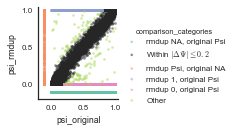

In [138]:
g = sns.FacetGrid(summary_fillna,
                  hue=col, palette=palette, 
#                   subplot_kws=dict(#ncols=2, nrows=7, wspace=0.01),
#                   hue_order=['0 <= Psi <= 1', 'rmdup NA', 'original NA'],
#                   palette=['#262626', original_na_color, rmdup_na_color],
                  col_order=case_order, size=2, aspect=1.1)
g.map(plt.scatter, 'psi_original', 'psi_rmdup', alpha=0.5, rasterized=True, s=5)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1], xlim=vlim, ylim=vlim)
g.add_legend()
# g.fig.tight_layout(w_pad=0.1)
g.savefig('{}/outrigger_vs_miso_psi.pdf'.format(figure_folder), dpi=300)


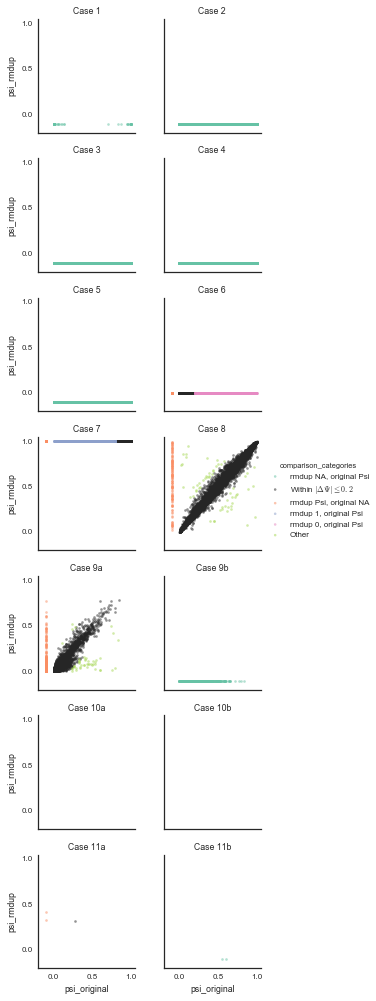

In [90]:
g = sns.FacetGrid(summary_fillna, col='notes_abbrev_rmdup', 
                  col_wrap=2,
                  hue=col, palette=palette, 
#                   subplot_kws=dict(#ncols=2, nrows=7, wspace=0.01),
#                   hue_order=['0 <= Psi <= 1', 'rmdup NA', 'original NA'],
#                   palette=['#262626', original_na_color, rmdup_na_color],
                  col_order=case_order, size=2)
g.map(plt.scatter, 'psi_original', 'psi_rmdup', alpha=0.5, rasterized=True, s=5)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1], xlim=vlim, ylim=vlim)
g.add_legend()
# g.fig.tight_layout(w_pad=0.1)
g.savefig('{}/outrigger_vs_miso_psi_faceted_by_rmdup_case_hue_na.pdf'.format(figure_folder), dpi=300)


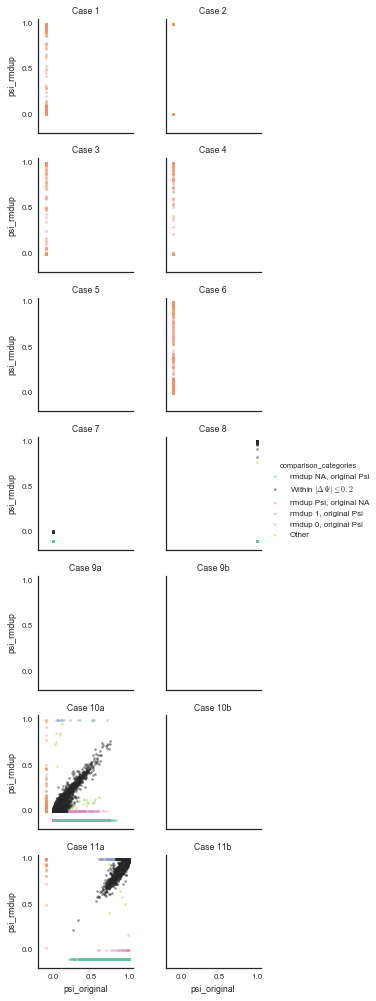

In [89]:
g = sns.FacetGrid(summary_fillna, col='notes_abbrev_original', 
                  col_wrap=2,
                  hue=col, palette=palette, 
#                   subplot_kws=dict(#ncols=2, nrows=7, wspace=0.01),
#                   hue_order=['0 <= Psi <= 1', 'rmdup NA', 'original NA'],
#                   palette=['#262626', original_na_color, rmdup_na_color],
                  col_order=case_order, size=2)
g.map(plt.scatter, 'psi_original', 'psi_rmdup', alpha=0.5, rasterized=True, s=5)
g.set_titles('{col_name}')

g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1], ylim=vlim, xlim=vlim)
g.add_legend()
# g.fig.tight_layout(w_pad=0.1)
g.savefig('{}/outrigger_vs_miso_psi_faceted_by_original_case_hue_na.pdf'.format(figure_folder), dpi=300)


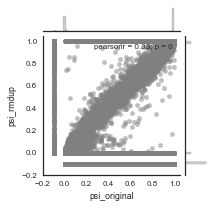

In [121]:
g = sns.jointplot('psi_original', 'psi_rmdup', summary_fillna, color='grey', 
                  joint_kws=dict(rasterized=True), size=3, alpha=0.5)
g.ax_joint.set(xlim=vlim, ylim=vlim)
g.savefig('{}/outrigger_vs_miso_psi_jointplot.pdf'.format(figure_folder), dpi=300)

## Number of events per cell

In [100]:
events_per_sample = summary_not_both_na.groupby(['sample_id'], group_keys=True).apply(lambda df: df[['psi_rmdup', 'psi_original']].notnull().sum())
print(events_per_sample.shape)
events_per_sample.head()

(242, 2)


,psi_rmdup,psi_original
sample_id,,
CVN_01,1848,5831
CVN_02,1399,4562
CVN_03,1103,3768
CVN_04,1874,5898
CVN_05,2089,6375


In [103]:
events_per_sample_tidy = events_per_sample.unstack().reset_index()
events_per_sample_tidy = events_per_sample_tidy.rename(columns={'level_0': 'dataset', 0: 'Number of events'})
events_per_sample_tidy.head()

,dataset,sample_id,Number of events
0,psi_rmdup,CVN_01,1848
1,psi_rmdup,CVN_02,1399
2,psi_rmdup,CVN_03,1103
3,psi_rmdup,CVN_04,1874
4,psi_rmdup,CVN_05,2089


In [104]:
events_per_sample_metadata = events_per_sample_tidy.join(study.metadata.data, on='sample_id')
print(events_per_sample_metadata.shape)
events_per_sample_metadata.head()

(484, 13)


,dataset,sample_id,Number of events,single,pooled,phenotype,neuron,progenitor,stressed,craig_venter,differentiation_batch,split,outlier
0,psi_rmdup,CVN_01,1848,True,False,NPC,False,True,False,True,NaN,NaN,False
1,psi_rmdup,CVN_02,1399,True,False,NPC,False,True,False,True,NaN,NaN,False
2,psi_rmdup,CVN_03,1103,True,False,NPC,False,True,False,True,NaN,NaN,False
3,psi_rmdup,CVN_04,1874,True,False,NPC,False,True,False,True,NaN,NaN,False
4,psi_rmdup,CVN_05,2089,True,False,NPC,False,True,False,True,NaN,NaN,False


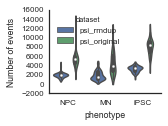

In [111]:
fig, ax = plt.subplots(figsize=(2, 1.5))

sns.violinplot(x='phenotype', y='Number of events', hue='dataset', data=events_per_sample_metadata, cut=True, 
               order=study.phenotype_order)
sns.despine()
fig.savefig('{}/number_of_events_per_sample_violinplots.pdf'.format(figure_folder))

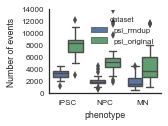

In [113]:
fig, ax = plt.subplots(figsize=(2, 1.5))

sns.boxplot(x='phenotype', y='Number of events', hue='dataset', data=events_per_sample_metadata, order=study.phenotype_order)
sns.despine()
fig.savefig('{}/number_of_events_per_sample_boxplots.pdf'.format(figure_folder))

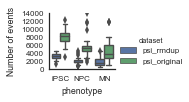

In [117]:
# fig, ax = plt.subplots(figsize=(2, 1.5))

sns.factorplot(x='phenotype', y='Number of events', hue='dataset', 
               data=events_per_sample_metadata, order=study.phenotype_order, 
               kind='box', size=1.5, aspect=1.33)
sns.despine()
fig.savefig('{}/number_of_events_per_sample_boxplots_faceted.pdf'.format(figure_folder))

In [33]:
# summary_fillna['either_na'] = "0 <= Psi <= 1"
# summary_fillna.loc[summary['psi_rmdup'].isnull(), 'either_na'] = 'rmdup NA'
# summary_fillna.loc[summary['psi_original'].isnull(), 'either_na'] = 'original NA'
# summary_fillna.head()

,,incompatible_junction0_original,incompatible_junction1_original,isoform1_junction13_original,isoform1_junction34_original,isoform2_junction12_original,isoform2_junction23_original,isoform2_junction24_original,notes_original,psi_original,notes_copy,...,isoform1_junction34_rmdup,isoform2_junction12_rmdup,isoform2_junction23_rmdup,isoform2_junction24_rmdup,notes_rmdup,psi_rmdup,bam,notes_abbrev_rmdup,dataset_rmdup,either_na
sample_id,event_id,,,,,,,,,,,,,,,,,,,,,
CVN_01,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2: Zero observed reads,...,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2,rmdup,original NA
CVN_02,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2: Zero observed reads,...,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2,rmdup,original NA
CVN_03,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2: Zero observed reads,...,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2,rmdup,original NA
CVN_04,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2: Zero observed reads,...,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2,rmdup,original NA
CVN_05,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2: Zero observed reads,...,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2,rmdup,original NA


In [48]:
summary_fillna.shape

(12567319, 25)

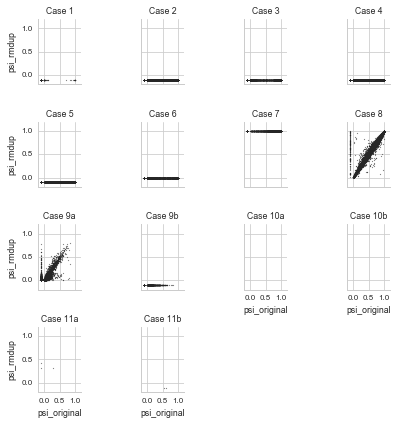

In [34]:
g = sns.FacetGrid(summary_fillna, col='notes_abbrev_rmdup', col_wrap=4, 
#                   hue_order=['0 <= Psi <= 1', 'rmdup NA', 'original NA']
#                   palette=['#262626', ''],
                  col_order=case_order, size=1.5)
g.map(plt.scatter, 'psi_original', 'psi_rmdup', alpha=0.5, color='#262626', rasterized=True, s=1)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
g.savefig('{}/psi_original_vs_rmdup_faceted_by_rmdup_case.pdf'.format(figure_folder), dpi=300)

## Add color for which is NA

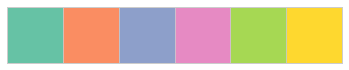

In [35]:
set2 = sns.color_palette('Set2')
sns.palplot(set2)
original_na_color = set2[1]
rmdup_na_color = set2[2]

In [36]:
gridspec_kws = dict(wspace=0.01, hspace=0.05)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/seaborn/axisgrid.py:313: UserWarning: `gridspec_kws` ignored when using `col_wrap`
  warnings.warn("`gridspec_kws` ignored when using `col_wrap`")


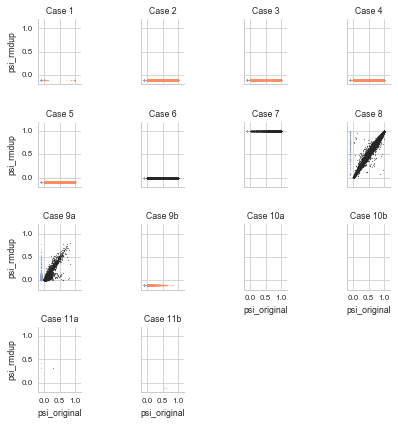

In [37]:
g = sns.FacetGrid(summary_fillna, col='notes_abbrev_rmdup', col_wrap=4, hue='either_na', 
                  hue_order=['0 <= Psi <= 1', 'rmdup NA', 'original NA'],
                  palette=['#262626', original_na_color, rmdup_na_color],
                  col_order=case_order, size=1.5, gridspec_kws=gridspec_kws)
g.map(plt.scatter, 'psi_original', 'psi_rmdup', alpha=0.5, rasterized=True, s=1)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
# g.savefig('{}/outrigger_vs_miso_psi_faceted_by_rmdup_case_hue_na.pdf'.format(figure_folder), dpi=300)

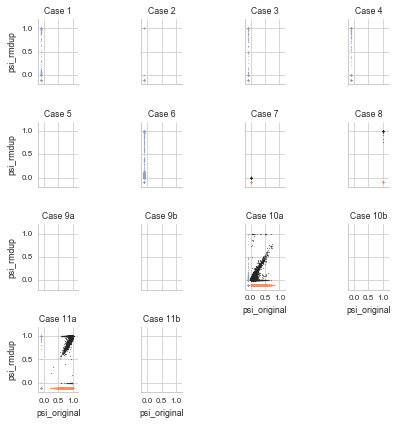

In [38]:
g = sns.FacetGrid(summary_fillna, col='notes_abbrev_original', col_wrap=4, hue='either_na', 
                  hue_order=['0 <= Psi <= 1', 'rmdup NA', 'original NA'],
                  palette=['#262626', original_na_color, rmdup_na_color],
                  col_order=case_order, size=1.5, gridspec_kws=gridspec_kws)
g.map(plt.scatter, 'psi_original', 'psi_rmdup', alpha=0.5, rasterized=True, s=1)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
# g.savefig('{}/outrigger_vs_miso_psi_faceted_by_original_case_hue_na.pdf'.format(figure_folder), dpi=300)

In [39]:
from flotilla.visualize.splicing import lavalamp

In [40]:
rmdup_psi.shape

(26453, 299)

In [41]:
def extract_alternative_constitutive(psi):
    """Separate percent spliced-in matrix to exons that are actually alterantive vs constitutive
    
    Parameters
    ----------
    psi : pandas.DataFrame
        This is a (samples, features) shaped dataframe
    
    Returns
    -------
    alternative, constitutively0, constitutively1 : pandas.DataFrame
        Slices of the input dataframe that are alternative or constitutive
    """

    notnull = psi.notnull()

    constitutively0 = (psi == 0)[notnull].all()
    constitutively1 = (psi == 1)[notnull].all()
    print(constitutively1.sum())
    alternative = psi.columns[~constitutively0 & ~constitutively1]

    constitutively0 = constitutively0[constitutively0].index
    constitutively1 = constitutively1[constitutively1].index

    return psi[alternative], psi[constitutively0], psi[constitutively1]


rmdup_alternative, rmdup_constitutively0, rmdup_constitutively1 = extract_alternative_constitutive(rmdup_psi.T)
print(rmdup_alternative.shape)
print(rmdup_constitutively0.shape)
print(rmdup_constitutively1.shape)

6334
(299, 15632)
(299, 7367)
(299, 6334)


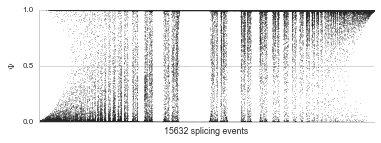

In [42]:
fig, ax = plt.subplots(figsize=(6, 2))
lavalamp(rmdup_alternative, ax=ax, markersize=1, color='#262626')
# fig.savefig('{}/lavalamp_rmdup.pdf'.format(figure_folder), dpi=300)

In [43]:
original_alternative, original_constitutively0, original_constitutively1 = extract_alternative_constitutive(original_psi.T)
print(original_alternative.shape)
print(original_constitutively0.shape)
print(original_constitutively1.shape)

11904
(251, 34982)
(251, 11435)
(251, 11904)


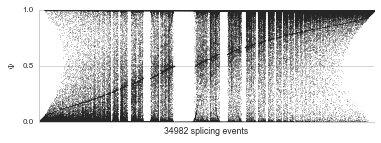

In [44]:
fig, ax = plt.subplots(figsize=(6, 2))
lavalamp(original_alternative, ax=ax, markersize=1, color='#262626')
# fig.savefig('{}/lavalamp_original.pdf'.format(figure_folder), dpi=300)

## Look at PKM

In [40]:
pkm_mxe_event = u'isoform1=junction:chr15:72494962-72499068:-@exon:chr15:72494795-72494961:-@junction:chr15:72492997-72494794:-'\
'|isoform2=junction:chr15:72495530-72499068:-@exon:chr15:72495363-72495529:-@junction:chr15:72492997-72495362:-'
pkm_mxe_event

u'isoform1=junction:chr15:72494962-72499068:-@exon:chr15:72494795-72494961:-@junction:chr15:72492997-72494794:-|isoform2=junction:chr15:72495530-72499068:-@exon:chr15:72495363-72495529:-@junction:chr15:72492997-72495362:-'